In [6]:
import jax.numpy as jnp
import numpy as np
from jax.lax import batch_matmul
from time import time
import matplotlib.pyplot as pl

### compare order on einsum 

In [51]:

def get_run(n, k, f):
    data = np.random.randn(n, k, f)
    times = []
    ffs = np.arange(min_, max_, step)
    for ff in ffs:
        t0 = time()
        pkkf = jnp.einsum("nkf, nlf->klf", data[:,:,:ff], data[:,:,:ff])
        times.append(time()-t0)
    times = np.array(times)

    data = data.transpose([2,1,0])
    # data = np.random.randn(f, k, n)
    times2 = []
    for ff in ffs:
        t0 = time()
        pkkf = jnp.einsum("fkn, fln->flk", data[:ff], data[:ff])
        times2.append(time()-t0)
    times2 = np.array(times2)

    times3 = []
    for ff in ffs:
        t0 = time()
        mat = batch_matmul(data[:ff],data[:ff].transpose([0,2,1]))
        times3.append(time()-t0)
    times3 = np.array(times3)
    return np.vstack([times, times2, times3]), ffs

In [60]:
min_ = 400
max_ = 10000
step = 400
n, k, f = 200, 15, max_
nruns = 8
times = np.array([get_run(data)[0] for i in range(nruns)])
ffs = get_run(data)[1]

Text(0, 0.5, 'time (seconds)')

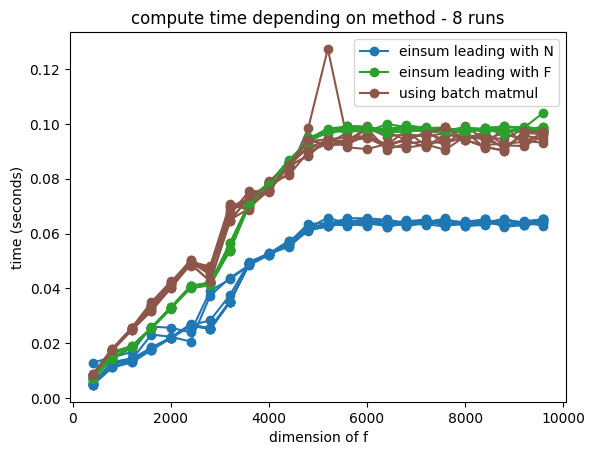

In [64]:
names = ['einsum leading with N', 'einsum leading with F', 'using batch matmul']
cmap = pl.get_cmap('tab10')
for nr in range(nruns):
    for i in range(3):
        pl.plot(ffs, times[nr,i], 'o-', c = cmap(i/3-0.1))
for i in range(3):
    pl.plot(ffs, times[nr,i], 'o-', c = cmap(i/3-0.1), label = names[i])        

pl.title(f'compute time depending on method - {nruns} runs')
pl.legend()
pl.xlabel('dimension of f')
pl.ylabel('time (seconds)')

### comparing einsum vs batchmatmul

In [21]:
data = np.random.randn(f, k, n)
times2 = []
for ff in ffs[:1]:
    t0 = time()
    pkkf = jnp.einsum("fkn, fln->flk", data[:ff], data[:ff])
    times2.append(time()-t0)
times2 = np.array(times2)





In [ ]:


from sklearn import linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(ffs[:,None], times[:,None])
pred = regr.predict(ffs[:,None]).squeeze()
pl.plot(ffs, pred,'-')
pl.plot(ffs, times,'.', alpha = .59)
pl.xlabel('dimension of f')
pl.ylabel('time (seconds)')